<a href="https://colab.research.google.com/github/BKover99/Pseudovisium/blob/main/Tutorials/Xenium_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading spatial transcriptomic and imaging data.

In [ ]:
!wget https://s3-us-west-2.amazonaws.com/10x.files/samples/xenium/1.6.0/Xenium_V1_mouse_pup/Xenium_V1_mouse_pup_outs.zip
!wget https://cf.10xgenomics.com/samples/xenium/1.6.0/Xenium_V1_mouse_pup/Xenium_V1_mouse_pup_he_imagealignment.csv
!wget https://cf.10xgenomics.com/samples/xenium/1.6.0/Xenium_V1_mouse_pup/Xenium_V1_mouse_pup_he_image.ome.tif

--2024-06-12 14:09:38--  https://s3-us-west-2.amazonaws.com/10x.files/samples/xenium/1.6.0/Xenium_V1_mouse_pup/Xenium_V1_mouse_pup_outs.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.132.200, 52.218.246.16, 52.92.203.88, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.132.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63763679465 (59G) [application/zip]
Saving to: ‘Xenium_V1_mouse_pup_outs.zip’

Xenium_V1_mouse_pup 100%[===================>]  59.38G  29.1MB/s    in 43m 36s 

2024-06-12 14:53:15 (23.2 MB/s) - ‘Xenium_V1_mouse_pup_outs.zip’ saved [63763679465/63763679465]

--2024-06-12 14:53:15--  https://cf.10xgenomics.com/samples/xenium/1.6.0/Xenium_V1_mouse_pup/Xenium_V1_mouse_pup_he_imagealignment.csv
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.


Unzipping the output

In [ ]:
!unzip /content/Xenium_V1_mouse_pup_outs.zip

Archive:  /content/Xenium_V1_mouse_pup_outs.zip
  inflating: cell_feature_matrix.h5  
 extracting: cell_feature_matrix.zarr.zip  
 extracting: analysis.zarr.zip       
  inflating: cells.csv.gz            
  inflating: cells.parquet           
 extracting: cells.zarr.zip          
  inflating: cell_boundaries.csv.gz  
  inflating: cell_boundaries.parquet  
 extracting: transcripts.zarr.zip    
  inflating: transcripts.csv.gz      
  inflating: transcripts.parquet     
  inflating: morphology.ome.tif      
  inflating: morphology_mip.ome.tif  
  inflating: morphology_focus.ome.tif  
  inflating: nucleus_boundaries.csv.gz  
  inflating: nucleus_boundaries.parquet  
  inflating: analysis_summary.html   
  inflating: experiment.xenium       
  inflating: metrics_summary.csv     
  inflating: gene_panel.json         
  inflating: analysis.tar.gz         
  inflating: cell_feature_matrix.tar.gz  


Installing packages

In [ ]:
!pip install numpy
!pip install pseudovisium
!pip install squidpy


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.2/146.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.1 MB/

Loading packages

In [ ]:
import squidpy as sq
import numpy as np

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


## Running pseudovisium_generate to perform hexagonal binning

In [ ]:
generate_pv

<function Pseudovisium.pseudovisium_generate.generate_pv(csv_file, img_file_path=None, shift_to_positive=False, hexagon_size=100, output_path=None, batch_size=1000000, alignment_matrix_file=None, project_name='project', image_pixels_per_um=1, tissue_hires_scalef=0.2, technology='Xenium', feature_colname='feature_name', x_colname='x_location', y_colname='y_location', cell_id_colname='None', quality_colname='qv', pixel_to_micron=False, max_workers=2, quality_filter=False, count_colname='NA', visium_hd_folder=None, smoothing=False, quality_per_hexagon=False, quality_per_probe=False, h5_x_colname='x', h5_y_colname='y', coord_to_um_conversion=1, spot_diameter=None)>

In [ ]:
from Pseudovisium.pseudovisium_generate import generate_pv
csv_file = "/content/transcripts.csv.gz"
img_file_path = "/content/Xenium_V1_mouse_pup_he_image.ome.tif"
alignment_matrix_file = "/content/Xenium_V1_mouse_pup_he_imagealignment.csv"

output_path = "/content"
hexagon_size = 50
pseudovisium_path = generate_pv(csv_file=csv_file,
                                hexagon_size=hexagon_size,
                                alignment_matrix_file=alignment_matrix_file,
                                output_path=output_path,
                                img_file_path=img_file_path,
                                  batch_size=20000000,
                                technology="Xenium",
                                max_workers=10,
                                quality_filter=True,
                                quality_per_hexagon=False,
                                quality_per_probe=False,
                                tissue_hires_scalef=0.02,
                                image_pixels_per_um=1/0.2125,
                                project_name='mouse')

You are using version:  ['Pseudovisium==0.0.41']
Date:  2024-06-12
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_hexauq06qyly
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Created batch 11
Created batch 12
Finished preprocessing. Total batches created: 12
Processing batches using 8 processes


Processing batches: 100%|██████████| 12/12 [08:05<00:00, 40.44s/batch]


Creating pseudovisium folder in output path:/content/pseudovisium/mouse
Using already existing folder: /content/pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 191440902.0
Number of unique hexagons: 22521
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
Alignment matrix found and will be used to create tissue_hires_image.png and tissue_lowres_image.png files in spatial folder.
Image provided at /content/Xenium_V1_mouse_pup_he_image.ome.tif
Creating tissue_hires_image.png file in spatial folder.
Creating arguments.json file in output path.
Time taken: 2175.6093170642853 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.


## Creating anndata object and quick plot showing sum transcript abundance per hexagon

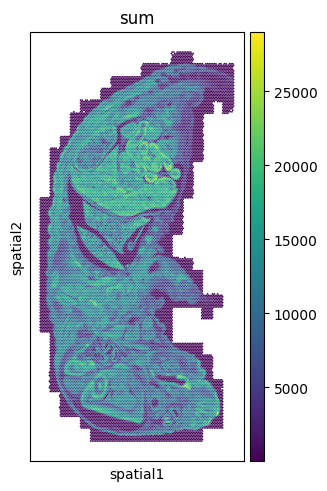

In [ ]:
mouse_pup_pv = sq.read.visium("/content/pseudovisium/mouse/", library_id="library_id")
mouse_pup_pv.obs["sum"]= np.array(np.sum(mouse_pup_pv.X,axis=1)).flatten()
sq.pl.spatial_scatter(
    mouse_pup_pv,color="sum",img=False
)

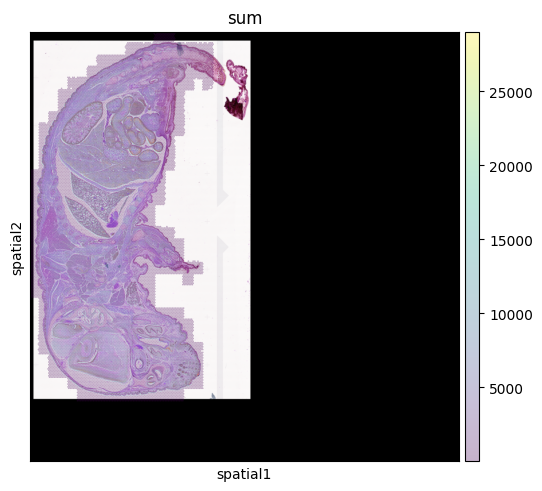

In [ ]:
sq.pl.spatial_scatter(
    mouse_pup_pv,color="sum",img=True,alpha=0.3
)

In [ ]:
folder = "/content/"
import scanpy as sc
import pandas as pd

adata_fullres = sc.read_10x_h5(
            filename=folder+"/cell_feature_matrix.h5"
        )
df = pd.read_csv(folder+"/cells.csv.gz")
df.set_index(adata_fullres.obs_names, inplace=True)
adata_fullres.obs = df.copy()
adata_fullres.obsm["spatial"] = adata_fullres.obs[["x_centroid", "y_centroid"]].copy().to_numpy()
sc.pp.calculate_qc_metrics(adata_fullres, percent_top=(50, 100, 200, 300), inplace=True)

In [ ]:
!pip install pympler -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
from pympler import asizeof


## Size of the full res dataset.

In [ ]:
print("Total size of the object:", asizeof.asizeof(adata_fullres)/ (1024 * 1024), "Mb")

Total size of the object: 3428.301803588867 Mb


## Size of the Pseudovisium binned dataset.

In [ ]:
print("Total size of the object:", asizeof.asizeof(mouse_pup_pv)/ (1024 * 1024), "Mb")

Total size of the object: 100.24409484863281 Mb
